<a href="https://colab.research.google.com/github/Juseong-Yu/hongonmachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃


In [ ]:
#도미 데이터(길이와 무게)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

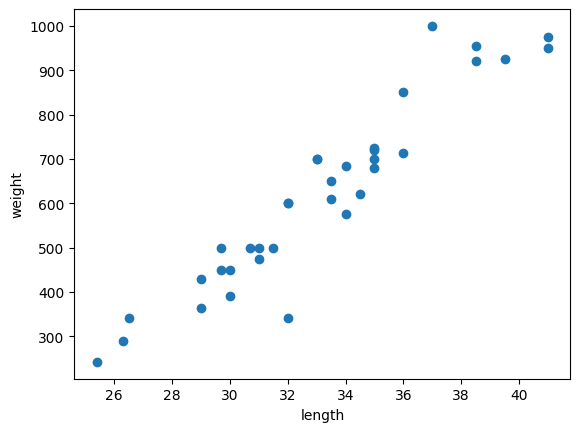

In [ ]:
# 도미의 길이와 무게에 따른 산점도
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) # 순서대로 x, y축
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

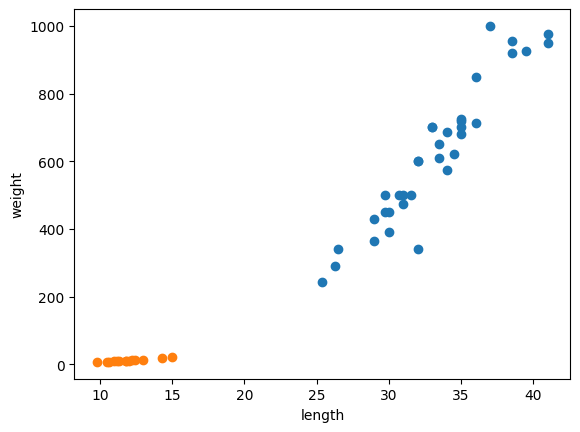

In [ ]:
# 도미와 빙어 데이터 산점도 동시에 표현
plt.scatter(bream_length, bream_weight) # 도미
plt.scatter(smelt_length, smelt_weight) # 빙어
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 도미와 빙어의 길이와 무게를 합쳐서 하나의 리스트로 만듦
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 사이킷런을 위해 2차원 리스트로 한 리스트에 legth한개 weigth 한 개 나오도록 변경 (리스트 내포)
fish_data = [[l, w] for l, w in zip(length, weight)]

In [ ]:
# 지도 학습을 위해 데이터의 정답을 준다
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# k-최근접이웃 알고리즘을 받아 생선 데이터에 적용하고 확인해보기, 기본적으로 k를 5로 둔다
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 길이가 30이고 무게가 600인 생선은 도미라고 예측한다
kn.predict([[30, 600]])

array([1])

In [ ]:
# k를 49로 두면 전체 샘플중에 가장 많은 데이터인 도미로 모든 데이터를 예측하기 때문에 문제다
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

# 훈련 세트와 테스트 세트

In [ ]:
# 물고기 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
# 데이터를 훈련 세트 35개와 테스트 세트 14개로 구분
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
# 훈련 세트를 k-최근접 이웃으로 훈련해서 테스트 세트로 체크함
# 훈련 세트에는 도미 데이터만 있고, 테스트 세트에는 빙어 데이터만 존재하기 때문에 테스트 결과가 0이 나옴
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [ ]:
# 파이썬 배열을 numpy 배열로 바꾸어줌
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [ ]:
# 데이터를 섞기 위해 새로운 리스트에 인덱스값을 섞고 이를 이용해 데이터를 분할
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

# 넘파이의 배열 슬라이싱을 이용
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


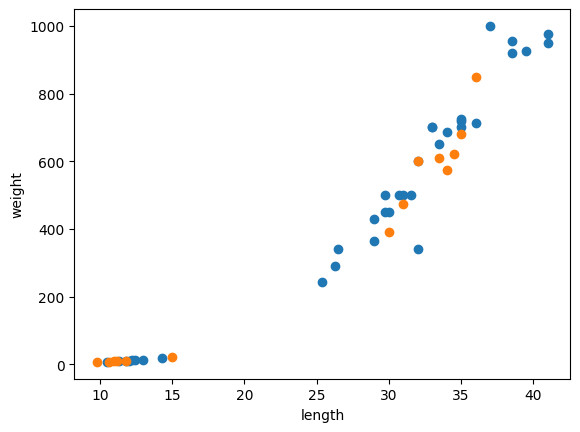

In [ ]:
# 산점도를 이용해 확인하면 훈련 세트와 테스트 세트가 랜덤하게 잘 분배 됨
import matplotlib.pyplot as plt

# 2차원 배열을 인덱싱 할 때 [행, 열]이다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘이 잘 작동하는 것을 알 수 있다.
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 데이터 전처리


In [ ]:
# 물고기 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

# 데이터를 numpy 배열로 빠르게 만듦
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 넘파이 함수를 이용해 1과 0이 채워진 리스트를 만든 후, concatenate로 합친다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 훈련 세트와 테스트 세트를 분리하는 사이킷런을 이용해 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [ ]:
# k-최근접 이웃 알고리즘을 이용해 모델 적합도 확인
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 실제로는 도미인 데이터를 확인해 보니 빙어로 나오네??
print(kn.predict([[25,150]]))

[0.]


In [ ]:
distances, indexs = kn.kneighbors([[25,150]])

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

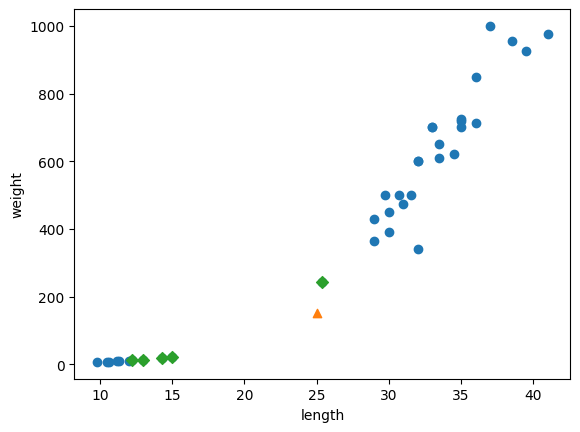

In [ ]:
import matplotlib.pyplot as plt

# 이상한 도미값과 가장 가까운 5개를 확인하기 위한 산점도
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

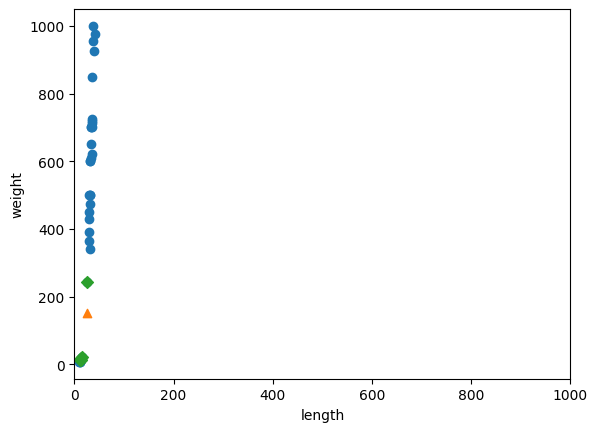

In [ ]:
# x 축과 y축의 눈금을 동일하게 두어 실제로 거리를 확인
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 표준점수를 구하기((특성 - 평균) / 표준편차)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

train_scaled = (train_input - mean) / std
print(train_scaled[:5])

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


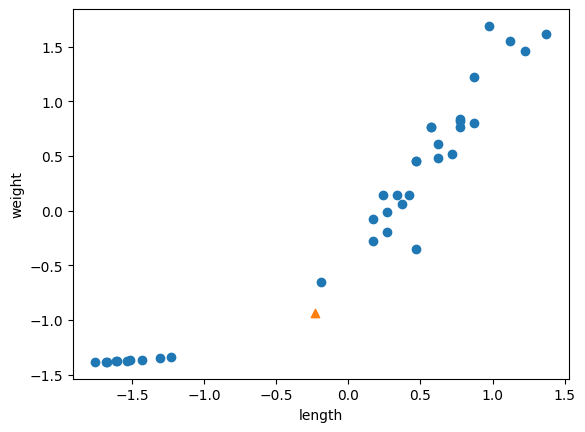

In [ ]:
# 표준점수를 이용한 산점도
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 평균점수로 만든 리스트를 k-최근접 이웃 알고리즘으로 훈련후 평가
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

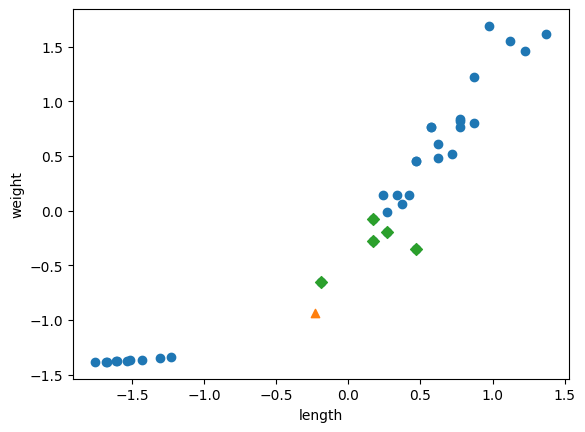

In [ ]:
# 이상한 도미값과 가장 가까운 5개를 확인하기 위한 산점도(평균점수)
distances, indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='D')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()


# k-최근접 이웃 회귀


In [1]:
import numpy as np

# 농어 데이터 준비 (길이, 무게)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

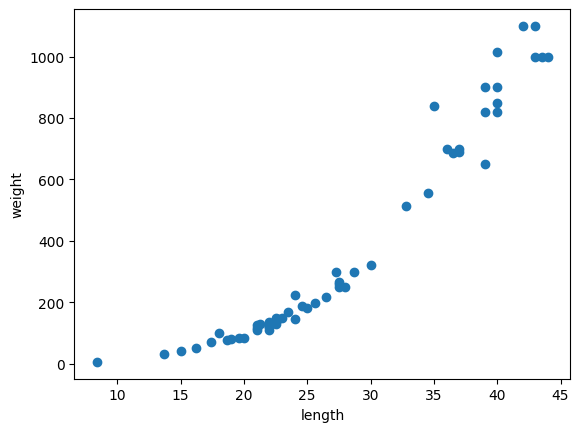

In [3]:
import matplotlib.pyplot as plt

# 농어 데이터의 산점도
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# 농어 데이터를 훈련 세트와 테스트 세트로 구분
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [8]:
# 입력 값을 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor

# k-최근접 이웃 회귀 모델을 생성
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 테스트 세트를 이용해 점수확인
print(knr.score(test_input, test_target))

0.992809406101064


In [11]:
from sklearn.metrics import mean_absolute_error

# 평균 오차값 구하기
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [12]:
# 적합정도를 조절하기 위해 결정계수 점수 확인
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [15]:
# 조금더 적합성을 높이기 위해 이웃의 개수 조정
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
